# NB1.3 Real Networks!
***Samantha Castro, Christopher Cumi, Juan Fernández, and Juliana Ramayo***

## 1. Facebook Network

The ```socfb-Northwestern25``` (socfb-Northwestern25.edges.gz) is a snapshot of Northwestern University’s Facebook network. The nodes are anonymous users and the links are friend relationships. Load this network into a NetworkX graph in order to answer the following questions. Be sure to use the proper graph class for an undirected, unweighted network.


In [ ]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt

1. What proportion of nodes have degree 100 or greater?

---



In [ ]:
facebook = nx.read_edgelist("/content/socfb-Northwestern25.edgelist", create_using=nx.Graph())

# Get degrees of all nodes
degrees = dict(facebook.degree())

# Count nodes with degree 100 or more
num_nodes_degree_100_or_more = sum(1 for degree in degrees.values() if degree >= 100)

# Total number of nodes in the graph
total_nodes = facebook.number_of_nodes()

# Calculate proportion
proportion = num_nodes_degree_100_or_more / total_nodes

print(f"Proportion of nodes with degree 100 or greater: {proportion:.4}")

Proportion of nodes with degree 100 or greater: 0.3821


2. What is the maximum degree for nodes in this network?

In [ ]:
# Find the maximum degree
max_degree = max(degrees.values())

print("Maximum degree:", max_degree)

Maximum degree: 2105


3. Users in this network are anonymized by giving the nodes numerical names. Which node hast the highest degree?

In [ ]:
# Find the node with the maximum degree
node_with_max_degree =max(degrees, key=degrees.get)
max_degree = degrees[node_with_max_degree]

print("Node with highest degree:", node_with_max_degree)
print("Degree:", max_degree)

Node with highest degree: 8262
Degree: 2105


4. What is the 95th percentile for degree, i.e. the value such that 95% of nodes have this degree or less?

In [ ]:
# Calculate the 95th percentile
percentile_95 = np.percentile(list(degrees.values()), 95)

print("95th percentile for degree:", percentile_95)

95th percentile for degree: 244.0


5. What is the mean degree for nodes in this network? Round to the nearest integer.

In [ ]:
# Calculate the mean degree
mean_degree = sum(degrees.values()) / len(degrees)

# Round to the nearest integer
mean_degree = int(mean_degree)

print("Mean degree:", mean_degree)

Mean degree: 92


6. Which of the following shapes best describes the degree distribution in this network? You can obtain the answer visually using histograms.

a. Uniform: node degrees are evenly distributed between the
minimum and maximum.

b. Normal: most node degrees are near the mean, dropping off rapidly in both directions.

c. Right-tailed: most node degrees are relatively small compared to the range of degrees.

d. Left-tailed: most node degrees are relatively large compared to the range of degrees.

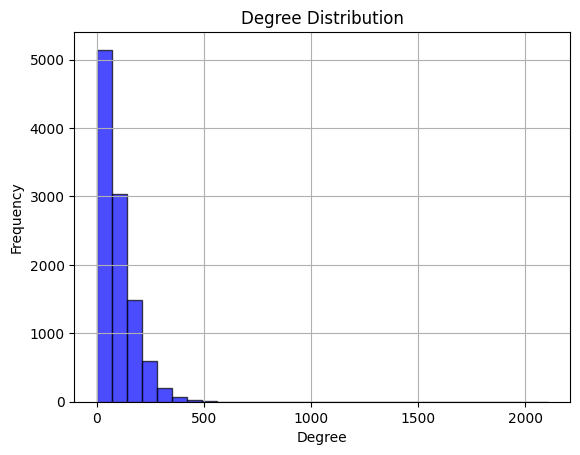

In [ ]:
# Extract degree values
degree_values = list(degrees.values())

# Plotting the histogram of node degrees
plt.hist(degree_values, bins=30, alpha=0.7, color='blue', edgecolor='black')
plt.xlabel('Degree')
plt.ylabel('Frequency')
plt.title('Degree Distribution')
plt.grid(True)
plt.show()

**The histogram provided for the degree distribution of the network clearly illustrates a right-tailed distribution. This kind of distribution is common in real-world networks, particularly in social and communication networks, where many nodes have few connections but a few nodes (hubs) have a disproportionately high number of connections.**

Once you measure the number of nodes and links, use ```nx.gnm_random_graph()```to create a separate random network with the same number of nodes and links as the Facebook graph. Use this random network to answer the following questions.

7. What is the 95th percentile for degree in the random network, i.e. the value such that 95% of nodes have this degree or less?

In [ ]:
# Calculate number of nodes and edges
num_nodes = facebook.number_of_nodes()
num_edges = facebook.number_of_edges()

print("Number of nodes:", num_nodes)
print("Number of edges:", num_edges)

Number of nodes: 10567
Number of edges: 488337


In [ ]:
# Generate a random graph with the same number of nodes and edges
random_graph = nx.gnm_random_graph(num_nodes, num_edges)

# Get degrees of all nodes in the random graph
degrees_random = dict(random_graph.degree())

# Extract degree values
degree_values_random = list(degrees_random.values())

# Calculate the 95th percentile for degree in the random network
percentile_95_random = np.percentile(degree_values_random, 95)

print("95th percentile for degree in the random network:", percentile_95_random)

95th percentile for degree in the random network: 109.0


8. Which of the following shapes best describes the degree distribution in this random network? You can obtain the answer visually using histograms.

a. Uniform: node degrees are evenly distributed between the
minimum and maximum.

b. Normal: most node degrees are near the mean, dropping off rapidly in both directions.

c. Right-tailed: most node degrees are relatively small compared to the range of degrees.

d. Left-tailed: most node degrees are relatively large compared to the range of degrees.

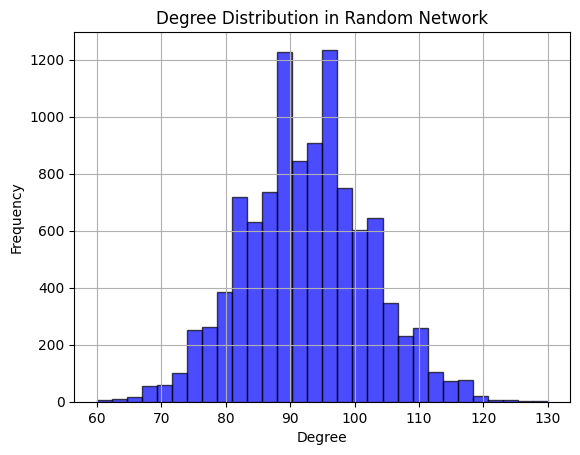

In [ ]:
# Plot histogram of degree distribution
plt.hist(degree_values_random, bins=30, alpha=0.7, color='blue', edgecolor='black')
plt.xlabel('Degree')
plt.ylabel('Frequency')
plt.title('Degree Distribution in Random Network')
plt.grid(True)
plt.show()

**The histogram displayed shows a normal distribution. This can be inferred from the shape of the histogram, which shows a central peak around the mean degree value and a symmetrical fall-off in frequency on both sides of the mean. This kind of distribution is expected in random networks.**

9. Estimate the average shortest-path length in this random network using a random sample of 1000 pairs of nodes.

In [ ]:
import random

# Function to estimate average shortest-path length
def estimate_avg_shortest_path_length(graph, num_samples=1000):
  """
  Estimates the average shortest-path length in a graph using a random sample of pairs of nodes.

  Args:
    - graph (networkx.Graph): A NetworkX graph object that should be connected.
    - num_samples (int, optional): The number of random pairs of nodes to sample. Defaults to 1000.

  Returns:
    - float: The estimated average shortest-path length.
    - None: If the graph is not connected, the function prints an error message and returns None.
  """
  # Ensure graph is connected
  if nx.is_connected(graph):
    nodes = list(graph.nodes())
    path_lengths = []

    for _ in range(num_samples):
      # Randomly select two different nodes
      node1, node2 = random.sample(nodes, 2)

      # Calculate the shortest path length between the nodes
      length = nx.shortest_path_length(graph, node1, node2)
      path_lengths.append(length)

    # Calculate the average of the path lengths
    avg_path_length = sum(path_lengths) / num_samples

    return avg_path_length
  else:
    print("The graph is not connected. Cannot estimate average shortest-path length.")
    return None

In [ ]:
# Estimate average shortest-path length
avg_shortest_path_length = estimate_avg_shortest_path_length(random_graph)

print(f"Estimated average shortest-path length in the random network: {avg_shortest_path_length:.4f}")

Estimated average shortest-path length in the random network: 2.4260


10. What is the average clustering coefficient of this random network? Answer to at least two decimal places.

In [ ]:
# Calculate average clustering coefficient
avg_clustering_coefficient = nx.average_clustering(random_graph)

print(f"Average clustering coefficient in the random network: {avg_clustering_coefficient:.4f}")

Average clustering coefficient in the random network: 0.0088


## 2. OpenFlights
Load the OpenFlights US flight (openflights_usa.edges.gz) network into a Network graph to answer the following questions.
1. What is the average number of routes served by each airport in this network?

In [ ]:
transportation = nx.read_edgelist("/content/openflights_usa.edges", create_using=nx.Graph())

# Calculate the degree of each node (number of routes per airport)
degrees = transportation.degree()

# Compute the average number of routes served by each airport
avg_routes_per_airport = sum(dict(degrees).values()) / transportation.number_of_nodes()

print(f"Average number of routes served by each airport: {avg_routes_per_airport:.4f}")

Average number of routes served by each airport: 10.1868


2. What are the top five airport in terms of number of routes?

In [ ]:
# Compute the average number of routes served by each airport
avg_routes_per_airport = sum(degrees.values()) / transportation.number_of_nodes()

print("Average number of routes served by each airport:", avg_routes_per_airport)

# Sort airports by number of routes in descending order
sorted_airports = sorted(degrees.items(), key=lambda x: x[1], reverse=True)

# Get the top five airports
top_five_airports = sorted_airports[:5]

print("Top five airports in terms of number of routes:")
for airport, num_routes in top_five_airports:
    print(f"Airport: {airport}, Number of routes: {num_routes}")

Average number of routes served by each airport: 10.186813186813186
Top five airports in terms of number of routes:
Airport: ATL, Number of routes: 153
Airport: ORD, Number of routes: 149
Airport: DEN, Number of routes: 148
Airport: DFW, Number of routes: 138
Airport: MSP, Number of routes: 117


3. How many airports in this network serve only a single route?

In [ ]:
# Count the number of airports with a single route
single_route_airports = sum(1 for degree in degrees.values() if degree == 1)

print("Number of airports that serve only a single route:", single_route_airports)

Number of airports that serve only a single route: 156


4. Which airport has the highest closeness centrality?

In [ ]:
# Calculate closeness centrality for all nodes
closeness_centrality = nx.closeness_centrality(transportation)

# Find the airport with the highest closeness centrality
max_closeness_airport = max(closeness_centrality, key=closeness_centrality.get)
max_closeness_value = closeness_centrality[max_closeness_airport]

print(f"Airport with the highest closeness centrality: {max_closeness_airport}, Closeness Centrality: {max_closeness_value:.4f}")

Airport with the highest closeness centrality: DEN, Closeness Centrality: 0.5039


5. Which airport has the highest betweeness centrality?

In [ ]:
# Calculate betweenness centrality for all nodes
betweenness_centrality = nx.betweenness_centrality(transportation)

# Find the airport with the highest betweenness centrality
max_betweenness_airport = max(betweenness_centrality, key=betweenness_centrality.get)
max_betweenness_value = betweenness_centrality[max_betweenness_airport]

print(f"Airport with the highest betweenness centrality: {max_betweenness_airport}, Betweenness Centrality: {max_betweenness_value:.4f}")

Airport with the highest betweenness centrality: ANC, Betweenness Centrality: 0.3190


## 3. Zachary's Karate Club

1. Find the best bisection of Zachary’s karate club network by applying the Kernighan–Lin algorithm. You can use the ```kernighan_lin_bisection()``` function of NetworkX. Compare the resulting bipartition with the natural partition of the network and expose similarities and differences.

In [ ]:
karate_club = nx.karate_club_graph()

# Apply the Kernighan–Lin algorithm to find the best bisection
partition = nx.algorithms.community.kernighan_lin_bisection(karate_club)

# Extract the two partitions
part1, part2 = partition

print("Partition 1:", part1)
print("Partition 2:", part2)

# Compare with the natural partition
# The natural partition is given by:
#   'Mr. Hi' (club_id='Mr. Hi'): nodes 0, 1, 2, 3, 7, 13, 17, 19, 21, 23, 24, 25, 27, 28, 31, 33
#   'Officer' (club_id='Officer'): nodes 4, 5, 6, 8, 9, 10, 11, 12, 14, 15, 16, 18, 20, 22, 26, 29, 30, 32

mr_hi = {0, 1, 2, 3, 7, 13, 17, 19, 21, 23, 24, 25, 27, 28, 31, 33}
officer = {4, 5, 6, 8, 9, 10, 11, 12, 14, 15, 16, 18, 20, 22, 26, 29, 30, 32}

print("\nNatural Partition 1 (Mr. Hi):", mr_hi)
print("Natural Partition 2 (Officer):", officer)

# Calculate the intersection of the partitions with the natural partitions
intersection_mr_hi_part1 = mr_hi.intersection(part1)
intersection_mr_hi_part2 = mr_hi.intersection(part2)
intersection_officer_part1 = officer.intersection(part1)
intersection_officer_part2 = officer.intersection(part2)

print("\nIntersection of Mr. Hi with Partition 1:", intersection_mr_hi_part1)
print("Intersection of Mr. Hi with Partition 2:", intersection_mr_hi_part2)
print("Intersection of Officer with Partition 1:", intersection_officer_part1)
print("Intersection of Officer with Partition 2:", intersection_officer_part2)

# Similarities and differences
similarities_mr_hi = intersection_mr_hi_part1 if len(intersection_mr_hi_part1) > len(intersection_mr_hi_part2) else intersection_mr_hi_part2
similarities_officer = intersection_officer_part1 if len(intersection_officer_part1) > len(intersection_officer_part2) else intersection_officer_part2

print("\nSimilarities with Mr. Hi's group:", similarities_mr_hi)
print("Similarities with Officer's group:", similarities_officer)

differences_mr_hi = mr_hi.difference(similarities_mr_hi)
differences_officer = officer.difference(similarities_officer)

print("\nDifferences with Mr. Hi's group:", differences_mr_hi)
print("Differences with Officer's group:", differences_officer)

Partition 1: {0, 1, 2, 3, 4, 5, 6, 7, 9, 10, 11, 12, 13, 16, 17, 19, 21}
Partition 2: {32, 33, 8, 14, 15, 18, 20, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31}

Natural Partition 1 (Mr. Hi): {0, 1, 2, 3, 7, 13, 17, 19, 21, 23, 24, 25, 27, 28, 31, 33}
Natural Partition 2 (Officer): {4, 5, 6, 8, 9, 10, 11, 12, 14, 15, 16, 18, 20, 22, 26, 29, 30, 32}

Intersection of Mr. Hi with Partition 1: {0, 1, 2, 3, 7, 13, 17, 19, 21}
Intersection of Mr. Hi with Partition 2: {33, 23, 24, 25, 27, 28, 31}
Intersection of Officer with Partition 1: {4, 5, 6, 9, 10, 11, 12, 16}
Intersection of Officer with Partition 2: {32, 8, 14, 15, 18, 20, 22, 26, 29, 30}

Similarities with Mr. Hi's group: {0, 1, 2, 3, 7, 13, 17, 19, 21}
Similarities with Officer's group: {32, 8, 14, 15, 18, 20, 22, 26, 29, 30}

Differences with Mr. Hi's group: {33, 23, 24, 25, 27, 28, 31}
Differences with Officer's group: {4, 5, 6, 9, 10, 11, 12, 16}


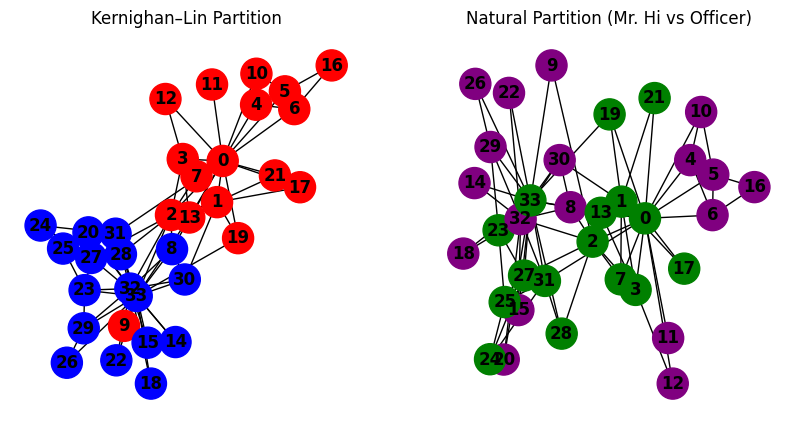

In [ ]:
# Extract the two partitions
part1, part2 = partition

# Define the natural partition based on club affiliation
mr_hi = {0, 1, 2, 3, 7, 13, 17, 19, 21, 23, 24, 25, 27, 28, 31, 33}
officer = {4, 5, 6, 8, 9, 10, 11, 12, 14, 15, 16, 18, 20, 22, 26, 29, 30, 32}

# Prepare node colors for visualization based on the Kernighan–Lin partition
node_colors = []
for node in karate_club.nodes():
  if node in part1:
    node_colors.append('red')  # First partition color
  else:
    node_colors.append('blue')  # Second partition color

# Draw the graph with node colors based on the algorithmic partition
plt.figure(figsize=(10, 5))
plt.subplot(121)
nx.draw(karate_club, node_color=node_colors, with_labels=True, node_size=500, font_weight='bold')
plt.title('Kernighan–Lin Partition')

# Prepare node colors for visualization based on the natural partition
node_colors_natural = ['green' if node in mr_hi else 'purple' for node in karate_club.nodes()]

# Draw the graph with node colors based on the natural partition
plt.subplot(122)
nx.draw(karate_club, node_color=node_colors_natural, with_labels=True, node_size=500, font_weight='bold')
plt.title('Natural Partition (Mr. Hi vs Officer)')

plt.show()

2. Apply the Girvan–Newman algorithm using the ```community.girvan_newman()``` function of NetworkX. Verify that the partition $P_{GN}$ in five clusters is the one with highest modularity.

In [ ]:
from networkx.algorithms.community import girvan_newman, modularity

# Apply the Girvan–Newman algorithm to generate partitions
comp = girvan_newman(karate_club)

# Convert the generator to a list to access partitions
partitions = [list(c) for c in comp]

# Initialize variables to track the partition with the highest modularity
best_partition = None
highest_modularity = -1

# Calculate the modularity for each partition up to 5 clusters
for partition in partitions:
    if len(partition) == 5:  # Stop when we reach 5 clusters
        mod = modularity(karate_club, partition)
        if mod > highest_modularity:
            highest_modularity = mod
            best_partition = partition

print("Partition with highest modularity in five clusters:")
print(best_partition)
print(f"Highest modularity: {highest_modularity:.4f}")

Partition with highest modularity in five clusters:
[{0, 1, 3, 7, 11, 12, 13, 17, 19, 21}, {2, 24, 25, 27, 28, 31}, {4, 5, 6, 10, 16}, {32, 33, 8, 14, 15, 18, 20, 22, 23, 26, 29, 30}, {9}]
Highest modularity: 0.3850


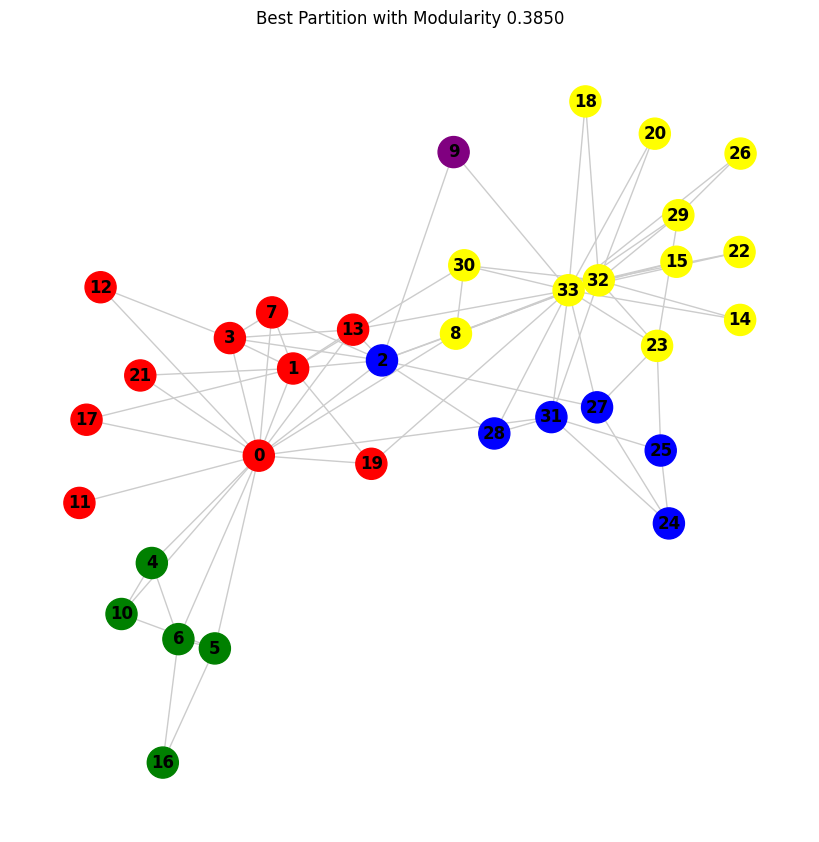

In [ ]:
# Creating a mapping of node to color
node_color_map = {}
for idx, community in enumerate(best_partition):
    for node in community:
        node_color_map[node] = idx  # Assign a unique color index for each community

# Map the node to actual colors for better visualization
colors = ['red', 'blue', 'green', 'yellow', 'purple']
node_colors = [colors[node_color_map[node]] if node in node_color_map else 'black' for node in karate_club.nodes()]

# Draw the graph with node colors based on the best partition
plt.figure(figsize=(8, 8))
nx.draw(karate_club, node_color=node_colors, with_labels=True, node_size=500, font_weight='bold', edge_color="#CCCCCC")
plt.title(f"Best Partition with Modularity {highest_modularity:.4f}")
plt.show()

3. The modularity maximization algorithm, proposed by Newman, iteratively joins pairs of communities if the move increases the partition's modularity. Read about the Greedy Modularity Algorithm to find communities ([link](http://networksciencebook.com/chapter/9#modularity)).

Write the general outline in the following space.

Modularity is a measure used to determine the strength of the division of a network into modules, also known as communities. It helps in quantifying the quality of the community structure in a network. A higher modularity value suggests a configuration where nodes within the same community are highly interconnected while being less connected to nodes in other communities.

The random hypothesis states that randomly wired networks lack an inherent community structure, as their connections are uniform without local density fluctuations that can define communities. This leads to the expectation that any community-like structure in such networks could be coincidental rather than indicative of any real subgroup. To test whether an observed dense community in a network is statistically significant, one compares its link density with that expected in a randomly rewired network maintaining the same degree distribution.

The greedy algorithm for modularity maximization, initially proposed by Newman, serves as a practical method to identify community structures in networks. Starting with each node as its own community, it iteratively merges communities to increase the overall modularity until no further beneficial merges are possible. The process records modularity values at each step, selecting the partitioning with the highest recorded modularity as the best community structure.

The practical applications and effectiveness of the greedy algorithm are illustrated through examples, such as the collaboration network among physicists. The algorithm successfully identifies meaningful communities that align with actual professional groupings, as confirmed by the significant modularity values obtained. However, modularity optimization includes the resolution limit, which can lead to merging of distinct communities if their combined size under a certain threshold boosts modularity. This sometimes forces smaller communities into larger ones against intuitive understandings of community boundaries. Further, in very large networks, the optimal modularity does not always distinctly identify the best community partition due to the presence of many close-to-optimal modularity values, creating a plateau in the modularity function landscape.

4. Apply the NetworkX function for greedy modularity optimization ```community.greedy_modularity_communities()```.
How many communities are there in the resulting partition $P_G$? Which partition has higher modularity, $P_{NG}$  or $P_G$?

In [ ]:
# Find communities in the karate club graph using the Greedy Modularity Community detection algorithm
communities = nx.community.greedy_modularity_communities(karate_club)

# Count the number of communities
num_communities = len(communities)
print(f"Number of communities in the partition PG: {num_communities}")

# Calculate the modularity of this partition
modularity_pg = nx.community.modularity(karate_club, communities)
print(f"Modularity of the partition PG: {modularity_pg:.4f}")


Number of communities in the partition PG: 3
Modularity of the partition PG: 0.4110


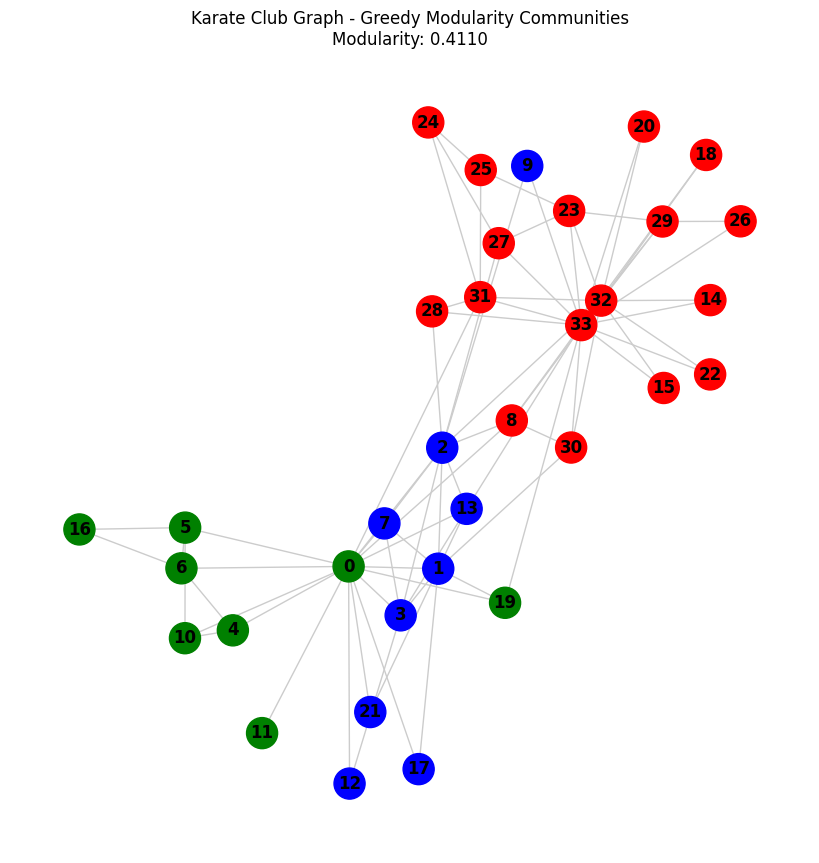

In [ ]:
# Creating a mapping of node to color index
node_color_map = {}
for idx, community in enumerate(communities):
    for node in community:
        node_color_map[node] = idx  # Assign a unique color index for each community

# Convert node color indexes to actual color names for better visualization
colors = ['red', 'blue', 'green']
node_colors = [colors[node_color_map[node]] for node in karate_club.nodes()]

# Draw the graph with node colors based on the community structure
plt.figure(figsize=(8, 8))
nx.draw(karate_club, node_color=node_colors, with_labels=True, node_size=500, font_weight='bold', edge_color="#CCCCCC")
plt.title(f"Karate Club Graph - Greedy Modularity Communities\nModularity: {modularity_pg:.4f}")
plt.show()